# Robot Path Planning and PID Control
***
# Table of Contents
1.  [Setup](#Setup)
2.  [Path Planning](#Path-Planning)
3.  [Path Smoothing](#Path-Smoothing)
4.  [PID Control](#PID-Control)


# Setup


This allowed me to split my code in several cells
making it easier to explain and mark which part of the assignment where.

For this I will mark each code cell by a quoted text, featuring which exercises where tackled.

Example:

> a(i)

```
grid = [[   .
            .
            .   ]]
```

Some code cells will have an md cell above it with the sub heading **Code Explanation** and some code cells will have one
beneath them with the sub heading **Comments**. These md cells will have code explanations and comments about the code
and/or results.

I am using python 3.7.

An html file generated by the Jupyter Notebook is attached for more readability.

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline

## Comments

I will be using matplotlib to draw the environment to better visualize and explain what is going on.

# Path Planning

In [2]:
grid = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
start = (3, 0)
goal = (5, 9)
cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

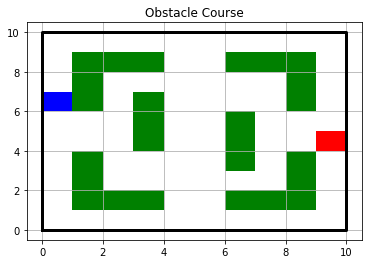

In [3]:
# Plot the grid with obstacles
def drawEnv():
    obstacles = [plt.Rectangle((1,1), 3, 1, fc='green'),
                 plt.Rectangle((1,1), 1, 3, fc='green'),
                 plt.Rectangle((6,1), 3, 1, fc='green'),
                 plt.Rectangle((8,1), 1, 3, fc='green'),
                 plt.Rectangle((3,4), 1, 3, fc='green'),
                 plt.Rectangle((6,3), 1, 3, fc='green'),
                 plt.Rectangle((1,6), 1, 3, fc='green'),
                 plt.Rectangle((1,8), 3, 1, fc='green'),
                 plt.Rectangle((8,6), 1, 3, fc='green'),
                 plt.Rectangle((6,8), 3, 1, fc='green'),]
    for obstacle in obstacles:
        plt.gca().add_patch(obstacle)
    # Start
    plt.gca().add_patch(plt.Rectangle((0,6), 1, 1, fc='blue'))
    # Goal
    plt.gca().add_patch(plt.Rectangle((9,4), 1, 1, fc='red'))

    plt.title("Obstacle Course")
    x_bounds = [0, 10, 10, 0, 0]
    y_bounds = [0, 0, 10, 10, 0]
    plt.plot(x_bounds, y_bounds, linewidth=3, color='black')
    plt.grid()
drawEnv()
plt.show()

In [18]:
def search(grid,init,goal,cost):
    closed = [[0 for r in range(len(grid[0]))] for c in range(len(grid))]
    closed[init[0]][init[1]] = 1 #initialise starting location as checked
    moves = []
    x = init[0]
    y = init[1]
    g = 0

    open = [[g,x,y]]

    found = False #flag = True when search is complete

    while found is False:

        #if we still have elements in the list
        if len(open) == 0:
            print('Fail')
            try:
                next = next
            finally:
                next = []
            return next, moves

        else:
            #remove node with smallest g value
            open.sort()
            open.reverse()
            next = open.pop() #next node
            g = next[0]
            x = next[1]
            y = next[2]

        if x == goal[0] and y == goal[1]:
            found = True

        else:
            for i, _delta in enumerate(delta): #delta is the list of all possible actions
                x2 = x + _delta[0]
                y2 = y + _delta[1]
                if 0 <= x2 < len(grid) and 0 <= y2 < len(grid[0]):
                    if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                        g2 = g + cost
                        # moves.append(delta_name[i])
                        open.append([g2, x2, y2])
                        closed[x2][y2] = 1
    return next, moves
ret = search(grid,start,goal,cost)
print(ret[0])
print(ret[1])
# Implement from scratch
# https://brilliant.org/wiki/a-star-search/

KeyboardInterrupt: 